### ***Theoretical Questions***

### 1.	What is unsupervised learning in the context of machine learning?
Unsupervised learning involves training algorithms on data that has no labeled outcomes. The goal is to discover hidden patterns or groupings within the data.

### 2.	How does K-Means clustering algorithm work?
K-Means divides the dataset into K clusters by initializing centroids, assigning each point to the nearest centroid, and then updating the centroids as the mean of assigned points until convergence.

### 3.	Explain the concept of a dendrogram in hierarchical clustering.?
A dendrogram is a tree-like diagram that illustrates the merging or splitting of clusters at various levels of similarity or distance in hierarchical clustering.

### 4.	What is the main difference between K-Means and Hierarchical Clustering?
K-Means requires the number of clusters in advance and is iterative; hierarchical clustering builds a tree structure and doesn't require specifying the number of clusters.

### 5.	What are the advantages of DBSCAN over K-Means?
DBSCAN can detect clusters of arbitrary shape, handle noise, and does not require specifying the number of clusters.

### 6.	When would you use Silhouette Score in clustering?
Silhouette Score is used to evaluate the quality of clusters by measuring cohesion and separation between clusters.

### 7.	What are the limitations of Hierarchical Clustering?
It has a high computational cost, is sensitive to outliers, and is not scalable for very large datasets.

### 8.	Why is feature scaling important in clustering algorithms like K-Means?
K-Means uses distance-based metrics, so unscaled features can bias the clustering results by giving more weight to variables with larger scales.

### 9.	How does DBSCAN identify noise points?
Points that are not core points and are not within the neighborhood (eps) of any core point are marked as noise.

### 10.	Define inertia in the context of K-Means ?
Inertia is the sum of squared distances between each point and its assigned cluster centroid. It measures how internally coherent clusters are.

### 11.	What is the elbow method in K-Means clustering?

The elbow method plots inertia against the number of clusters to identify the point where adding more clusters provides diminishing returns.

### 12.	Describe the concept of "density" in DBSCAN.?
Density is based on the number of points within a defined radius (eps). Dense areas with at least min_samples points are considered clusters.

### 13.	Can hierarchical clustering be used on categorical data?

Yes, with appropriate distance measures such as Hamming distance, hierarchical clustering can be applied to categorical data.

### 14.	What does a negative Silhouette Score indicate?
It indicates that the sample may be assigned to the wrong cluster, as it is closer to another cluster than its own.

### 15.	Explain the term "linkage criteria" in hierarchical clustering.?
Linkage criteria define how distances between clusters are calculated, e.g., single, complete, or average linkage.

### 16.	Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
K-Means assumes equal-sized, spherical clusters. It struggles with non-uniform cluster sizes or densities, leading to poor results.


### 17.	What are the core parameters in DBSCAN, and how do they influence clustering?
The main parameters are eps and min_samples. eps defines the neighborhood radius, and min_samples sets the minimum points to form a dense region.

### 18.	How does K-Means++ improve upon standard K-Means initialization?
K-Means++ chooses initial centroids more strategically to improve convergence speed and clustering quality.

### 19.	What is agglomerative clustering?
It’s a type of hierarchical clustering that starts with each data point as a separate cluster and merges them iteratively based on similarity.

### 20.	What makes Silhouette Score a better metric than just inertia for model evaluation?
Silhouette Score considers both intra-cluster cohesion and inter-cluster separation, providing a more holistic measure of clustering quality than inertia alone.



### **Practical Questions** 


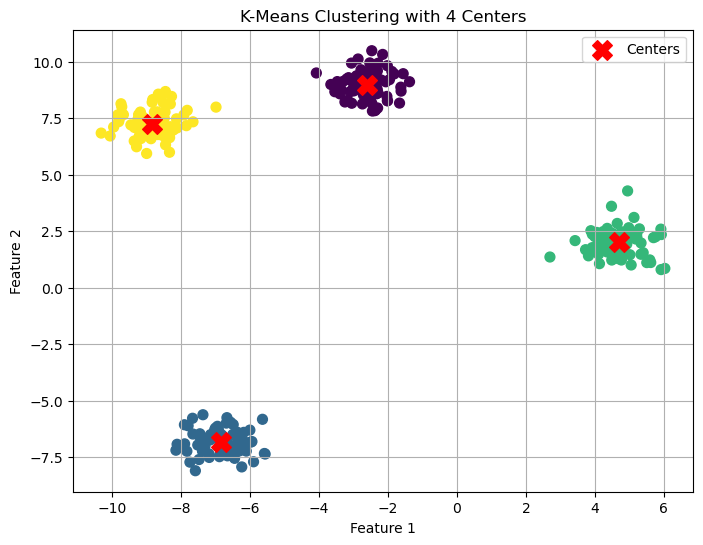

In [2]:
# 21.	Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

import os
os.environ["OMP_NUM_THREADS"] = "1"  # limits OpenMP threads to avoid MKL conflict

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centers')
plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [4]:

# 22.	 Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data  # Only features, not target labels

# Step 2: Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X)

# Step 3: Display the first 10 predicted labels
print("First 10 predicted labels:")
print(labels[:10])


First 10 predicted labels:
[1 1 1 1 1 1 1 1 1 1]


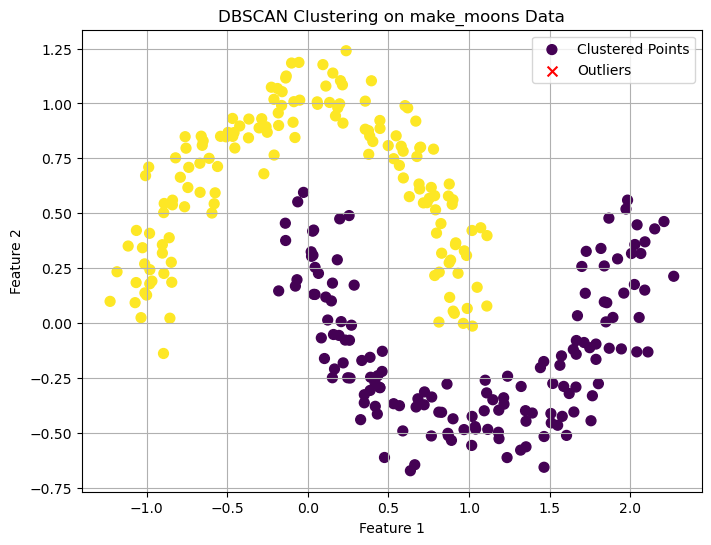

In [6]:
# 23.	 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic moon-shaped data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))

# Core + border points
plt.scatter(X[labels != -1][:, 0], X[labels != -1][:, 1],
            c=labels[labels != -1], cmap='viridis', s=50, label='Clustered Points')

# Outliers (label == -1)
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1],
            c='red', s=50, marker='x', label='Outliers')

plt.title("DBSCAN Clustering on make_moons Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [8]:
# 24.	 Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Step 1: Load the Wine dataset
wine = load_wine()
X = wine.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means clustering (we'll use 3 clusters to match wine classes)
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)

# Step 4: Print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster sizes:")
for cluster_id, size in zip(unique, counts):
    print(f"Cluster {cluster_id}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


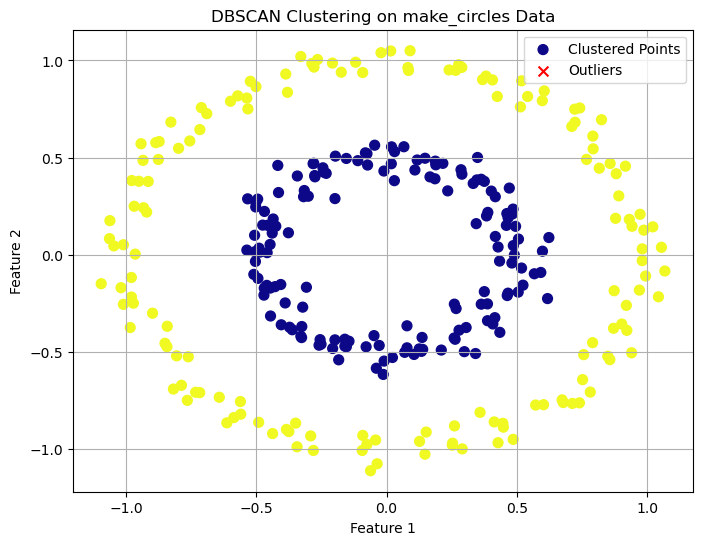

In [10]:
# 25.	 Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic circular data
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))

# Plot clustered points
plt.scatter(X[labels != -1][:, 0], X[labels != -1][:, 1],
            c=labels[labels != -1], cmap='plasma', s=50, label='Clustered Points')

# Plot outliers
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1],
            c='red', marker='x', s=50, label='Outliers')

plt.title("DBSCAN Clustering on make_circles Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# 26.	 Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd

# Step 1: Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_scaled)

# Step 4: Output cluster centroids
centroids = kmeans.cluster_centers_

# Convert to DataFrame for better readability
centroids_df = pd.DataFrame(centroids, columns=data.feature_names)
print("Cluster Centroids (scaled features):")
print(centroids_df)


Cluster Centroids (scaled features):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     0.504836      0.395603        0.505787   0.363766         0.469887   
1     0.255354      0.288335        0.246964   0.143884         0.357431   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          0.422263        0.418387              0.46928       0.458997   
1          0.180195        0.103448              0.13066       0.340118   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                0.299459  ...      0.480474       0.451074         0.465530   
1                0.255916  ...      0.205241       0.320690         0.192421   

   worst area  worst smoothness  worst compactness  worst concavity  \
0    0.314606          0.498688           0.363915         0.390273   
1    0.099434          0.357112           0.148739         0.131423   

   worst concave points  worst symmetry  worst fracta

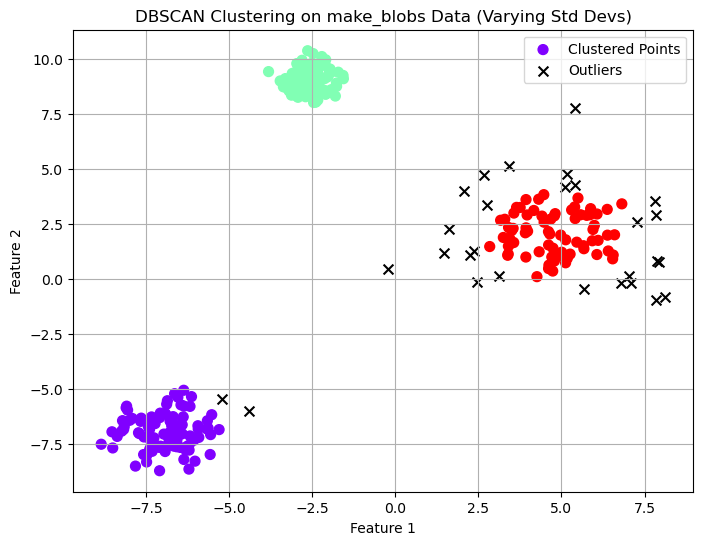

In [14]:
# 27.	 Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Step 1: Generate synthetic data with varying cluster standard deviations
X, y = make_blobs(n_samples=300,
                  centers=3,
                  cluster_std=[0.5, 1.5, 0.8],  # Different spread for each cluster
                  random_state=42)

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))

# Plot clustered points
plt.scatter(X[labels != -1][:, 0], X[labels != -1][:, 1],
            c=labels[labels != -1], cmap='rainbow', s=50, label='Clustered Points')

# Plot outliers
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1],
            c='black', marker='x', s=50, label='Outliers')

plt.title("DBSCAN Clustering on make_blobs Data (Varying Std Devs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


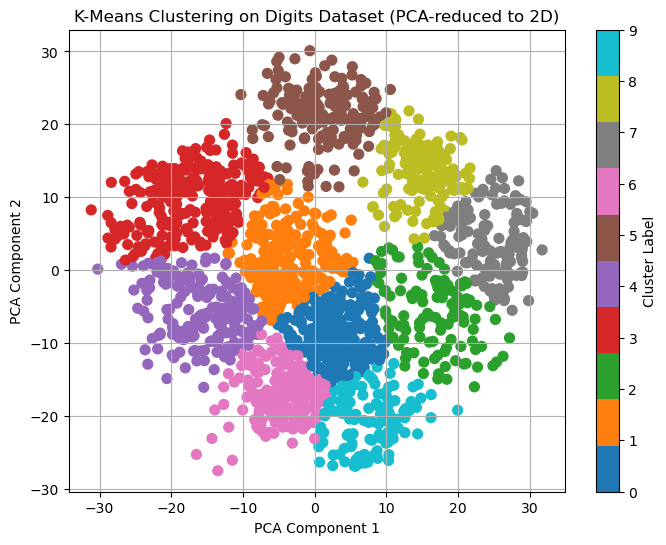

In [16]:
# 28.	 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # Not used for clustering but useful for comparison

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means clustering (10 clusters for digits 0-9)
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_pca)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=50)
plt.title("K-Means Clustering on Digits Dataset (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.colorbar(label='Cluster Label')
plt.show()


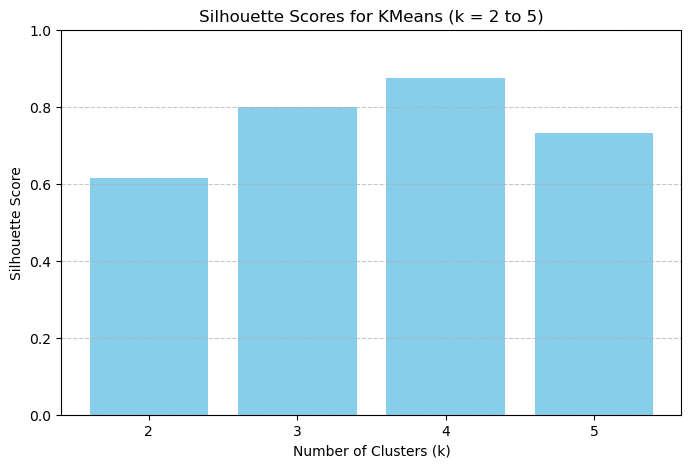

In [18]:
# 29.	 Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic blob data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Evaluate silhouette scores for k = 2 to 5
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Step 3: Plot the silhouette scores as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans (k = 2 to 5)")
plt.xticks(k_values)
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


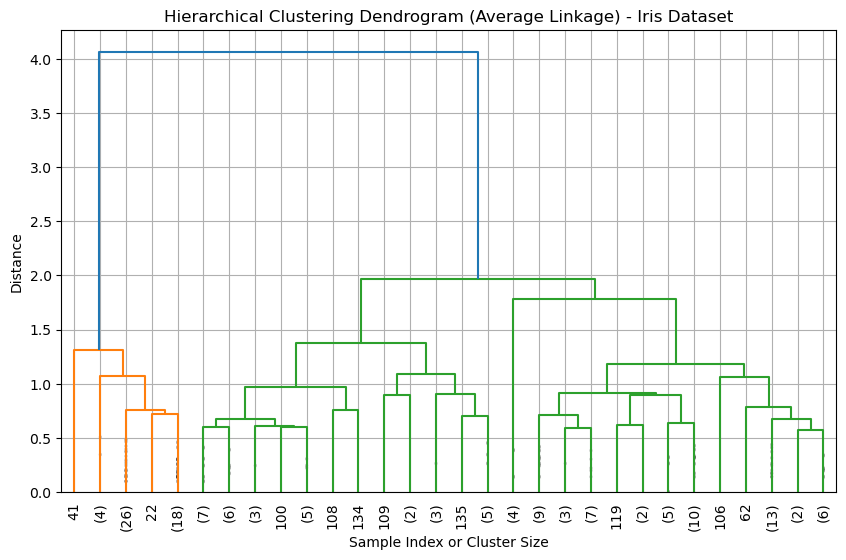

In [20]:
# 30.	 Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Compute linkage matrix using average linkage
linkage_matrix = linkage(X, method='average')

# Step 3: Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix,
           truncate_mode='lastp',  # Optional: for simplified view
           p=30,                   # Show only the last 30 merged clusters
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (Average Linkage) - Iris Dataset")
plt.xlabel("Sample Index or Cluster Size")
plt.ylabel("Distance")
plt.grid(True)
plt.show()


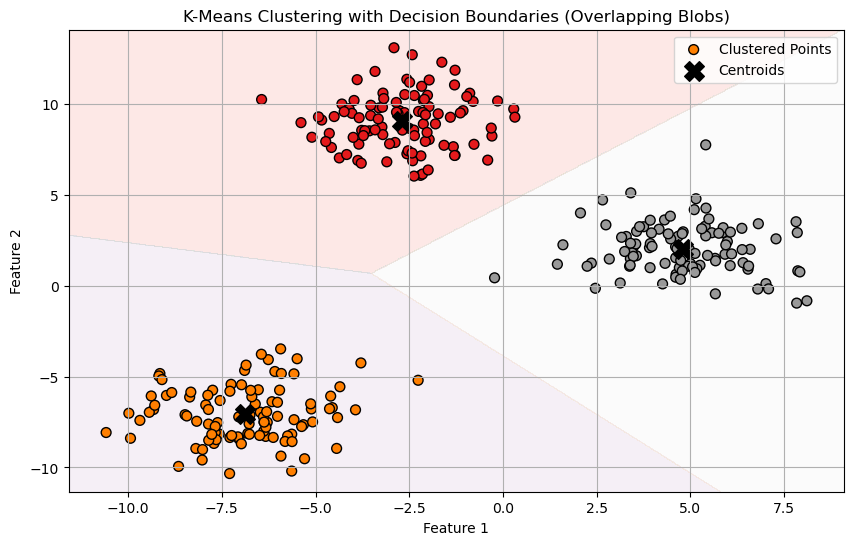

In [22]:
# 31.	 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data with overlapping clusters
X, y_true = make_blobs(n_samples=300,
                       centers=3,
                       cluster_std=1.5,  # Higher std to cause overlap
                       random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 3: Plot the decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='Set1', edgecolor='k', label='Clustered Points')

# Plot centroids
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering with Decision Boundaries (Overlapping Blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12616\1695412263.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_tsne[labels == label, 0],


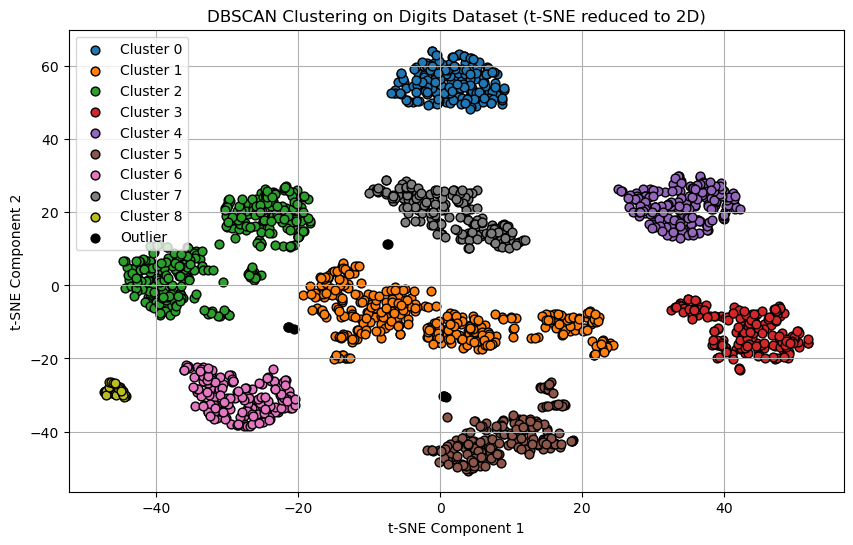

In [25]:
# 32.	 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # Actual labels (not used in DBSCAN, but useful for comparison)

# Step 2: Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))

# Outliers are labeled -1 in DBSCAN
unique_labels = set(labels)
colors = plt.cm.tab10.colors

for label in unique_labels:
    color = 'black' if label == -1 else colors[label % 10]
    label_name = 'Outlier' if label == -1 else f'Cluster {label}'
    plt.scatter(X_tsne[labels == label, 0],
                X_tsne[labels == label, 1],
                s=40,
                c=color,
                label=label_name,
                edgecolor='k')

plt.title("DBSCAN Clustering on Digits Dataset (t-SNE reduced to 2D)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(True)
plt.show()


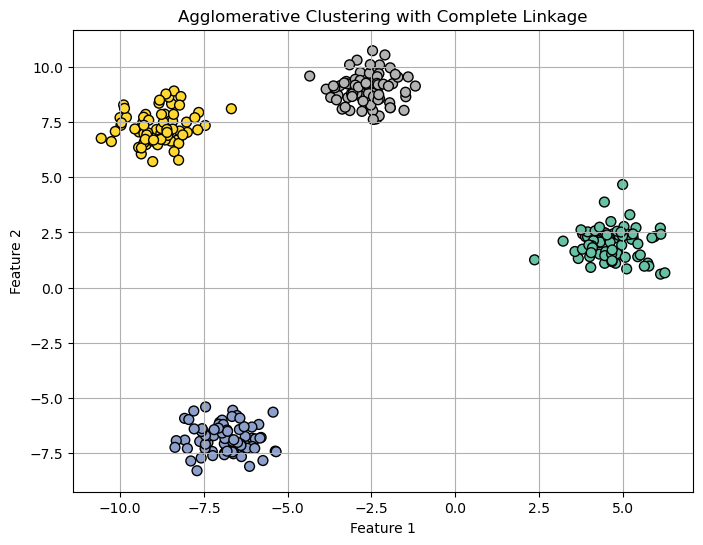

In [26]:
# 33.	 Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# Step 2: Apply Agglomerative Clustering with complete linkage
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_cluster.fit_predict(X)

# Step 3: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=50, edgecolor='k')
plt.title("Agglomerative Clustering with Complete Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


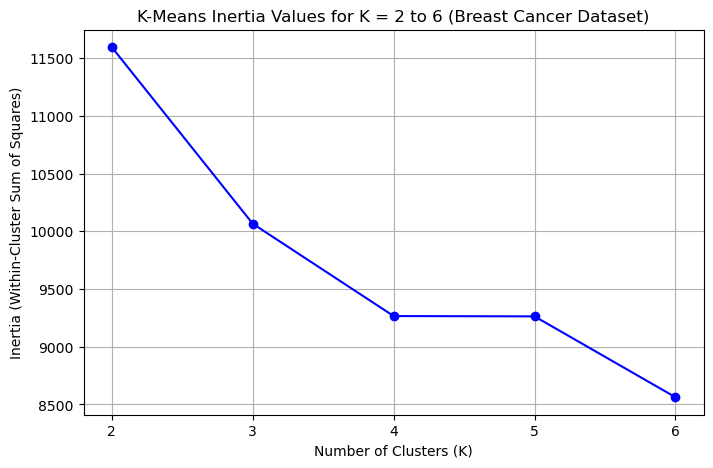

In [29]:
# 34.	 Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load and standardize the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Calculate inertia for K = 2 to 6
inertia_values = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Step 3: Plot the inertia values
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='blue')
plt.title("K-Means Inertia Values for K = 2 to 6 (Breast Cancer Dataset)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.xticks(k_values)
plt.show()


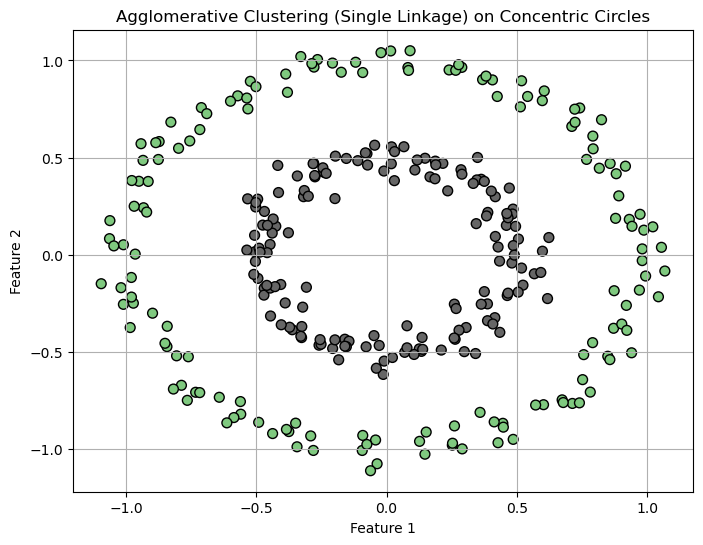

In [31]:
# 35.	 Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Generate concentric circle data
X, y_true = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Step 2: Apply Agglomerative Clustering with single linkage
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_cluster.fit_predict(X)

# Step 3: Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50, edgecolor='k')
plt.title("Agglomerative Clustering (Single Linkage) on Concentric Circles")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [33]:
# 36.	 Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Wine dataset
data = load_wine()
X = data.data

# Step 2: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # You can tweak these params
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count the number of clusters (excluding noise, which is labeled -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters found (excluding noise): {n_clusters}")


Number of clusters found (excluding noise): 0


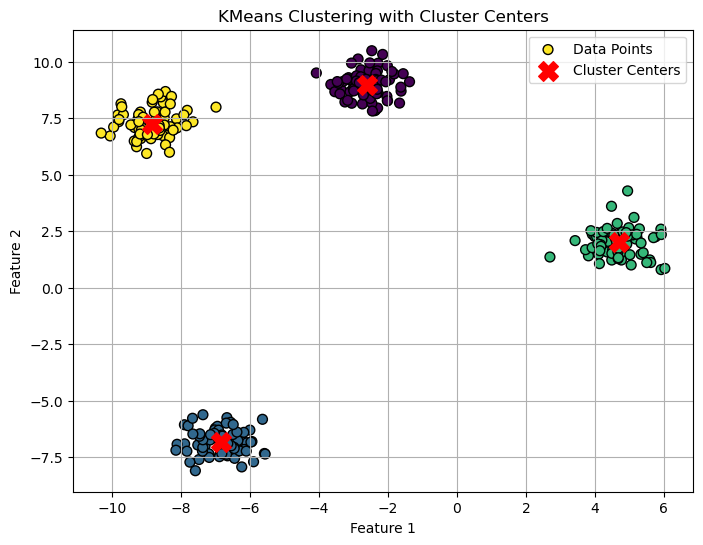

In [35]:
# 37.	 Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Step 3: Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolor='k', label="Data Points")
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Cluster Centers")

plt.title("KMeans Clustering with Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# 38.	 Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Load the Iris dataset
data = load_iris()
X = data.data

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  # You can tweak eps if needed
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count noise samples (label == -1)
n_noise = np.sum(labels == -1)
print(f"Number of samples identified as noise: {n_noise}")



Number of samples identified as noise: 4


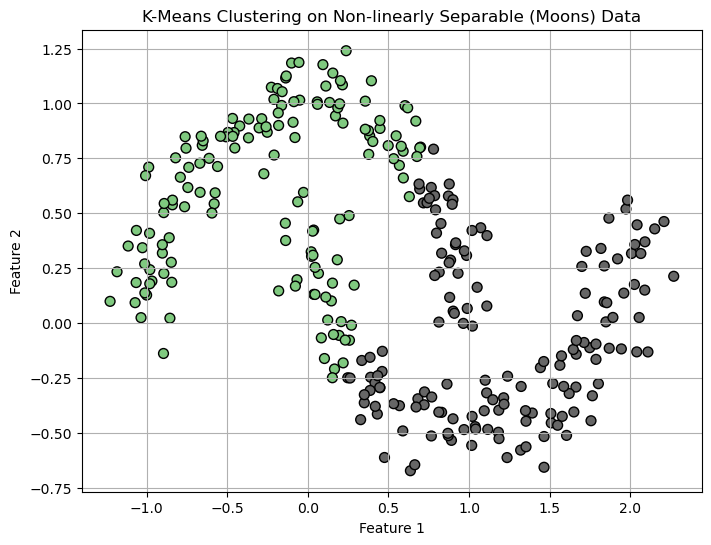

In [39]:
# 39.	 Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate non-linearly separable data
X, y_true = make_moons(n_samples=300, noise=0.1, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

# Step 3: Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Accent', s=50, edgecolor='k')
plt.title("K-Means Clustering on Non-linearly Separable (Moons) Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


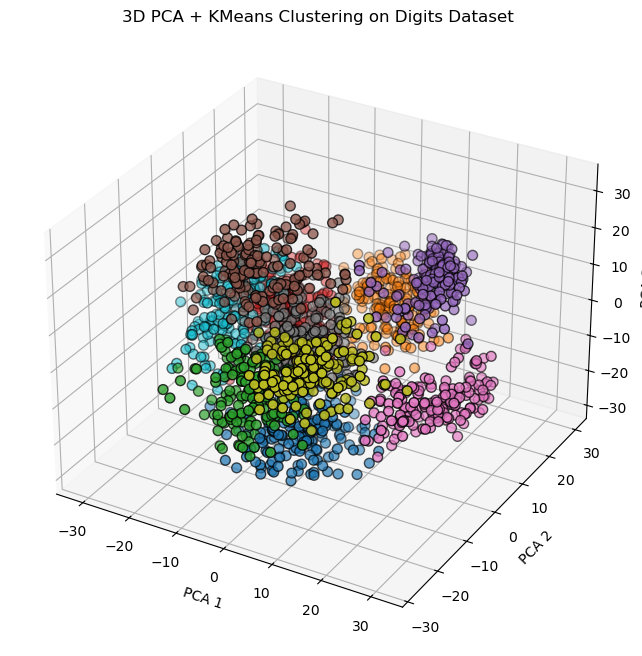

In [41]:
# 40.	 Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot. .

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Step 1: Load the Digits dataset
digits = load_digits()
X = digits.data

# Step 2: Reduce dimensions to 3 using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')  # 10 digits
labels = kmeans.fit_predict(X_pca)

# Step 4: 3D scatter plot of the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                     c=labels, cmap='tab10', s=50, edgecolor='k')

ax.set_title("3D PCA + KMeans Clustering on Digits Dataset")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.show()


Silhouette Score for KMeans with 5 clusters: 0.799


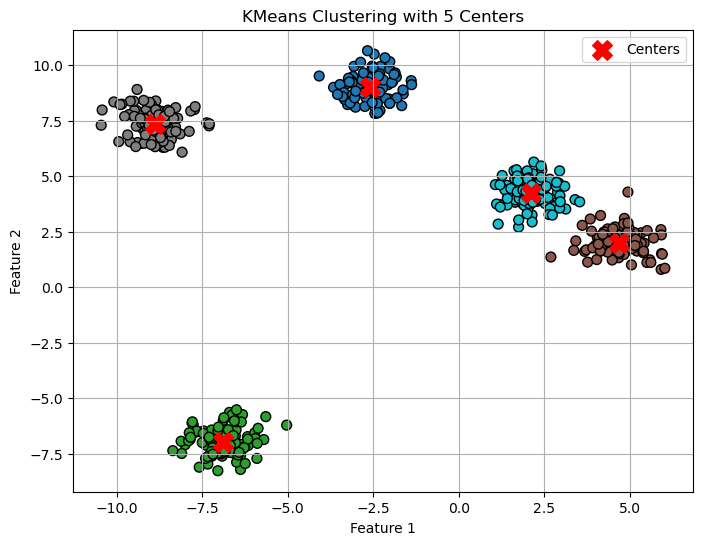

In [43]:
# 41.	Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data with 5 centers
X, y_true = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=42)

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

# Step 3: Evaluate clustering with silhouette score
score = silhouette_score(X, labels)
print(f"Silhouette Score for KMeans with 5 clusters: {score:.3f}")

# Optional: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', s=200, marker='X', label='Centers')
plt.title("KMeans Clustering with 5 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


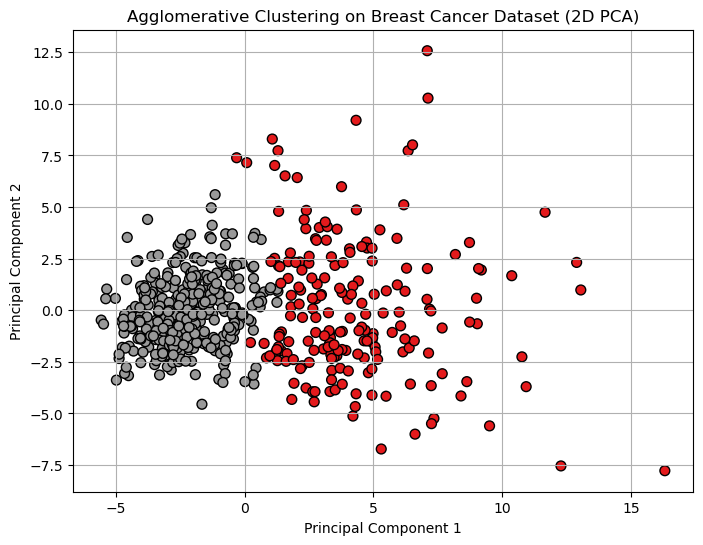

In [45]:
# 42.	 Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Load and scale the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agglo.fit_predict(X_pca)

# Step 4: Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=50, edgecolor='k')
plt.title("Agglomerative Clustering on Breast Cancer Dataset (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


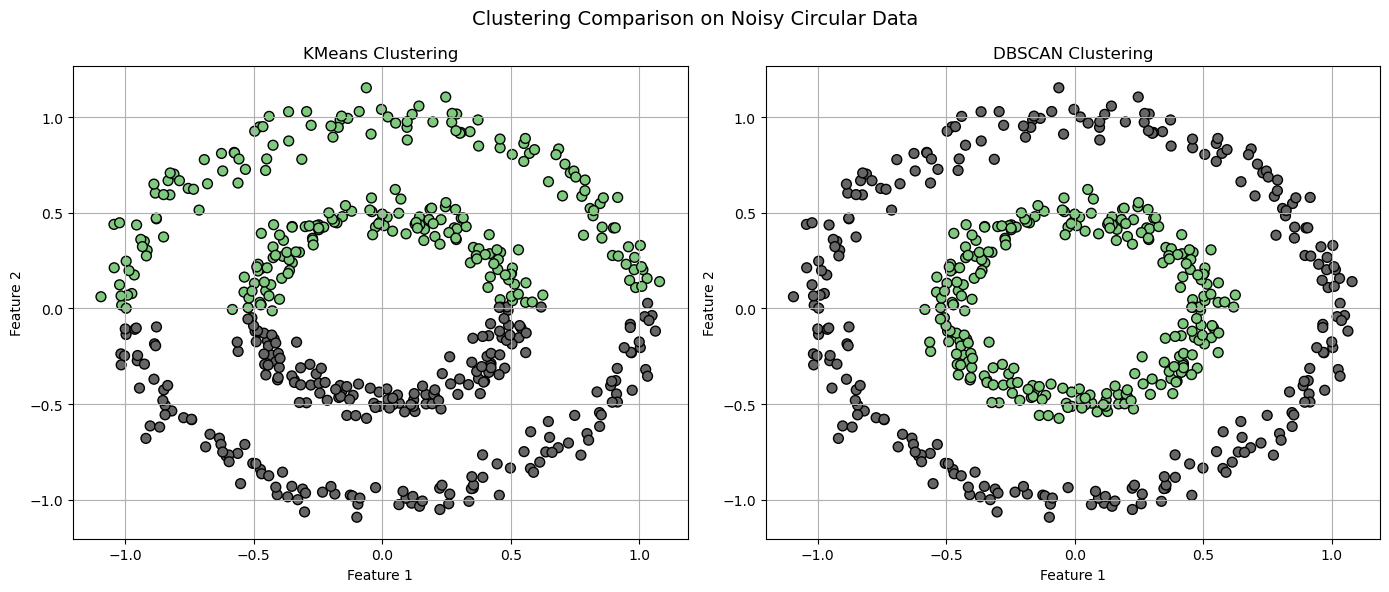

In [47]:
# 43.	Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Generate noisy circular data
X, y = make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)

# Step 2: Scale the data for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Step 5: Visualize results side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# KMeans Plot
axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Accent', s=50, edgecolor='k')
axes[0].set_title("KMeans Clustering")

# DBSCAN Plot
axes[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Accent', s=50, edgecolor='k')
axes[1].set_title("DBSCAN Clustering")

for ax in axes:
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True)

plt.suptitle("Clustering Comparison on Noisy Circular Data", fontsize=14)
plt.tight_layout()
plt.show()


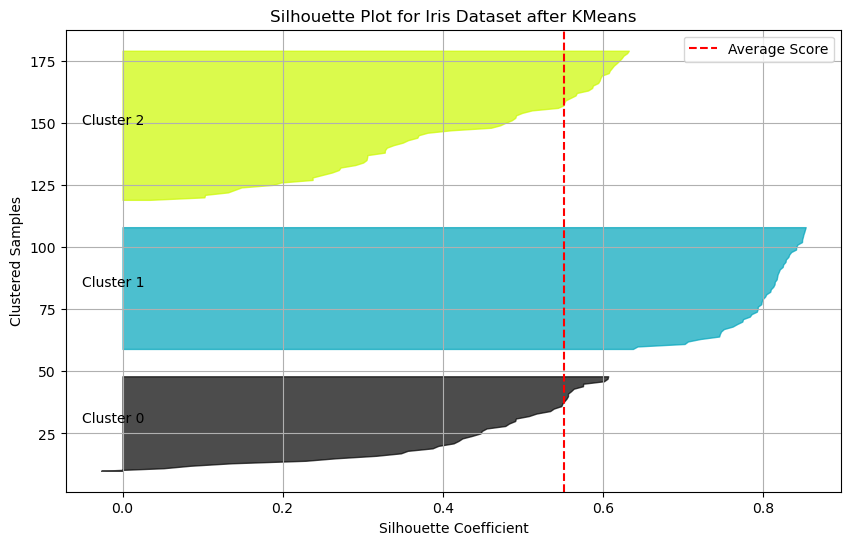

In [51]:
# 44.	 Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load Iris dataset
iris = load_iris()
X = iris.data

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X)

# Step 3: Calculate silhouette scores
sample_silhouette_values = silhouette_samples(X, labels)

# Step 4: Plot silhouette scores for each sample
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(3):  # for each cluster
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 3)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f'Cluster {i}')
    y_lower = y_upper + 10  # space between clusters

# Step 5: Plot formatting
plt.axvline(x=silhouette_score(X, labels), color="red", linestyle="--", label="Average Score")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Clustered Samples")
plt.title("Silhouette Plot for Iris Dataset after KMeans")
plt.legend()
plt.grid(True)
plt.show()



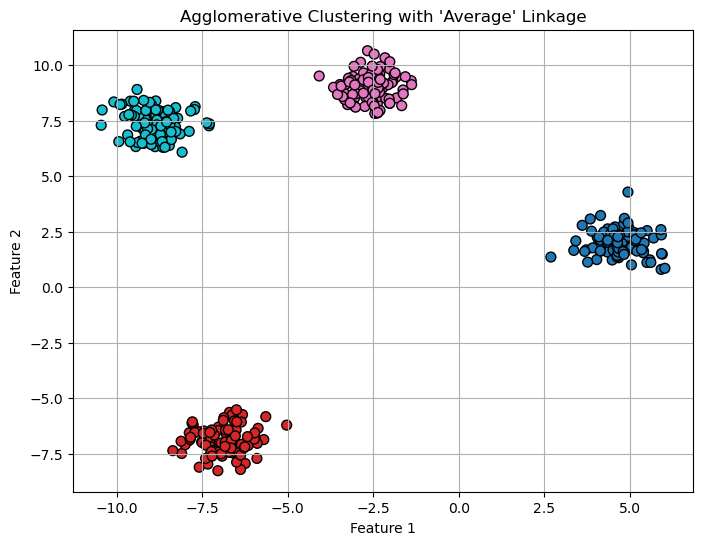

In [53]:
# 45.	 Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply Agglomerative Clustering with 'average' linkage
agglo = AgglomerativeClustering(n_clusters=4, linkage='average')
labels = agglo.fit_predict(X)

# Step 3: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=50, edgecolor='k')
plt.title("Agglomerative Clustering with 'Average' Linkage")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()



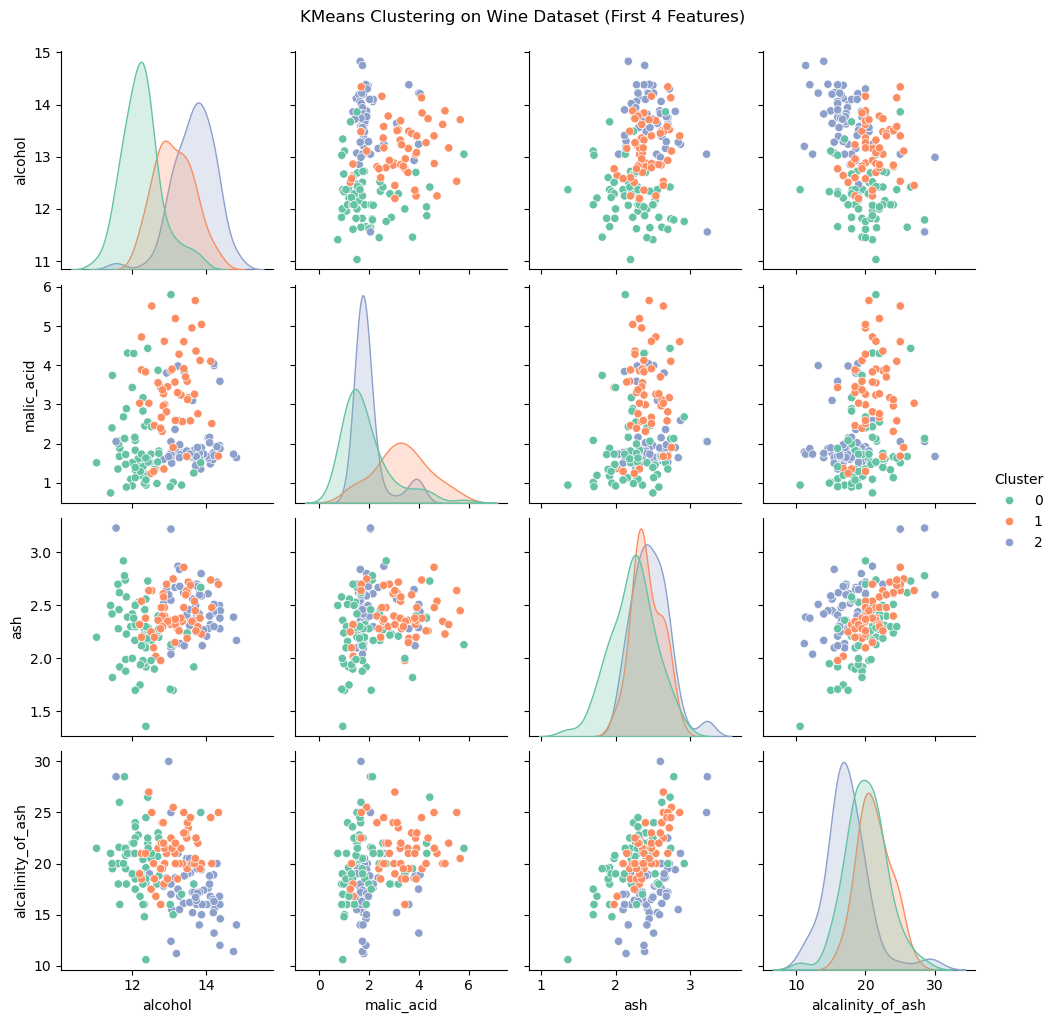

In [55]:
# 46.	 Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features)
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load Wine dataset
wine = load_wine()
X = wine.data
feature_names = wine.feature_names
df = pd.DataFrame(X, columns=feature_names)

# Step 2: Scale the data (KMeans performs better with scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_scaled)

# Step 4: Prepare DataFrame for pairplot (first 4 features)
df_pair = df.iloc[:, :4].copy()
df_pair['Cluster'] = labels

# Step 5: Visualize with Seaborn pairplot
sns.pairplot(df_pair, hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("KMeans Clustering on Wine Dataset (First 4 Features)", y=1.02)
plt.show()


In [57]:
# 47.	Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Generate noisy blob data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Scale the data
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Step 4: Count clusters and noise points
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found (excluding noise): {n_clusters}")
print(f"Number of noise points: {n_noise}")



Number of clusters found (excluding noise): 3
Number of noise points: 0


In [ ]:
# 48.	 Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Load Digits dataset
digits = load_digits()
X = digits.data
y = digits.target  # Optional, if you want to compare with actual labels

# Step 2: Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Step 3: Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=10)  # Digits dataset has 10 digits
labels = agglo.fit_predict(X_tsne)

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab10', s=30, edgecolor='k')
plt.title("Agglomerative Clustering on t-SNE Reduced Digits Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()
